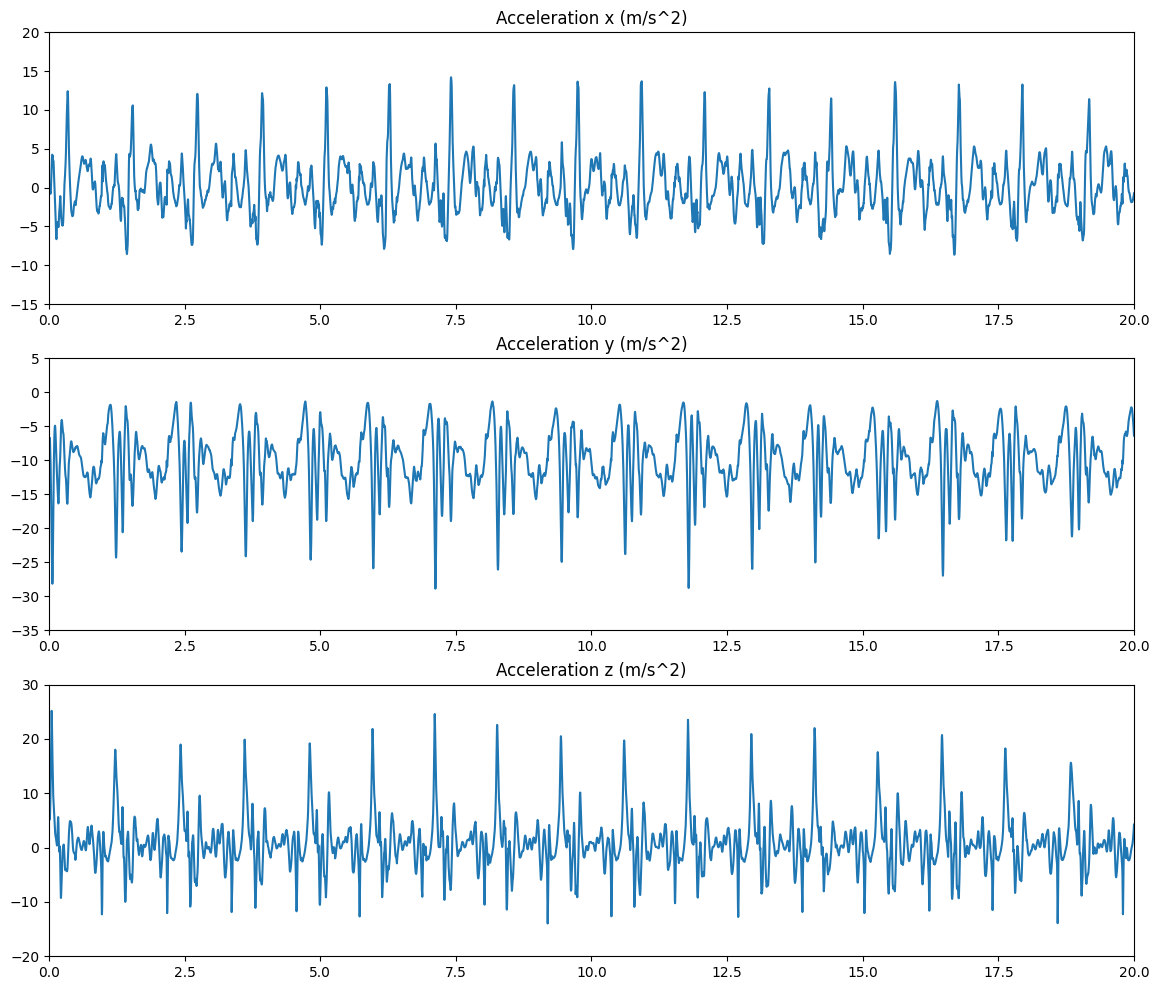

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

acc = pd.read_csv('./acc_gps/Accelerometer.csv')

# Rajausta
xaxis = [0, 20]

plt.figure(figsize=(14, 12))
plt.subplot(3, 1, 1, title='Acceleration x (m/s^2)')
plt.plot(acc['Time (s)'], acc['Acceleration x (m/s^2)'])
plt.axis(xaxis + [-15, 20])
plt.subplot(3, 1, 2, title='Acceleration y (m/s^2)')
plt.plot(acc['Time (s)'], acc['Acceleration y (m/s^2)'])
plt.axis(xaxis + [-35, 5])
plt.subplot(3, 1, 3, title='Acceleration z (m/s^2)')
plt.plot(acc['Time (s)'], acc['Acceleration z (m/s^2)'])
plt.axis(xaxis + [-20, 30])
plt.show()

In [38]:
# acc_linear = pd.read_csv('./linear_acc_gps/Linear Acceleration.csv')

# plt.figure(figsize=(14, 12))
# plt.subplot(3, 1, 1, title='Linear Acceleration x (m/s^2)')
# plt.plot(acc_linear['Time (s)'], acc_linear['Linear Acceleration x (m/s^2)'])
# plt.axis(xaxis + [-15, 20])
# plt.subplot(3, 1, 2, title='Linear Acceleration y (m/s^2)')
# plt.plot(acc_linear['Time (s)'], acc_linear['Linear Acceleration y (m/s^2)'])
# plt.axis(xaxis + [-25, 15])
# plt.subplot(3, 1, 3, title='Linear Acceleration z (m/s^2)')
# plt.plot(acc_linear['Time (s)'], acc_linear['Linear Acceleration z (m/s^2)'])
# plt.axis(xaxis + [-25, 30])

# plt.show()

<class 'numpy.ndarray'>
Askelmäärä:  515.0


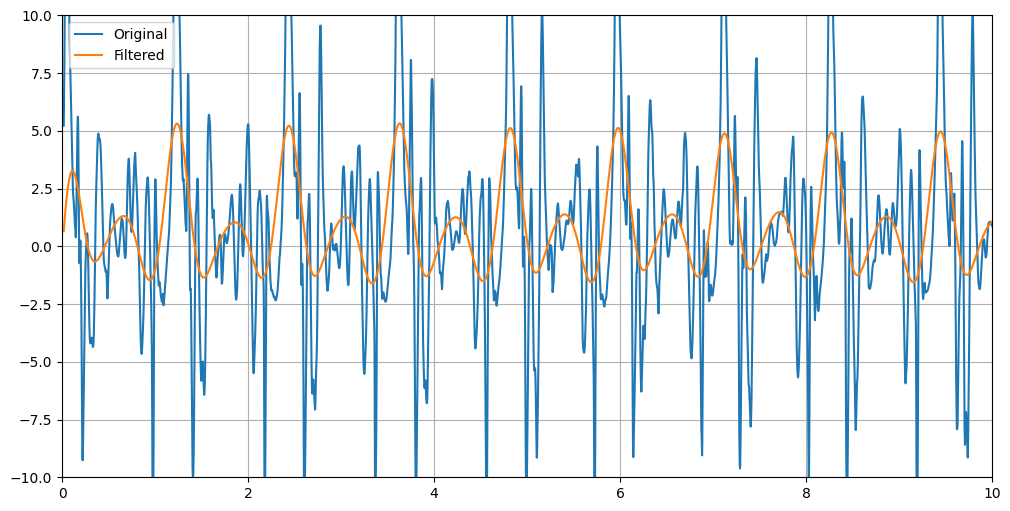

In [43]:
def butter_lowpass(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

tmp = acc

# Filter parameters:
T = tmp['Time (s)'][len(tmp['Time (s)'])-1] - tmp['Time (s)'][0]
n = len(tmp['Time (s)'])	# Datapisteiden määrä
fs = n/T					# Näytteenottotaajuus (oletus, että jotekuten vakio)
nyq = fs/2					# Nyquist-taajuus
order = 3					# Kertaluku
cutoff = 1/(0.5)			# Cutoff-taajuus

# Käppyrä
filtered_low = butter_lowpass(tmp['Acceleration z (m/s^2)'], cutoff, fs, nyq, order)

plt.figure(figsize=(12,6))
plt.plot(tmp['Time (s)'], tmp['Acceleration z (m/s^2)'])
plt.plot(tmp['Time (s)'], filtered_low)
plt.legend(['Original', 'Filtered'])
plt.grid()
plt.axis([0, 10, -10, 10])

jaksot = 0
for i in range(len(filtered_low)-1):
    if filtered_low[i]/filtered_low[i+1] < 0:
        jaksot += 1


print("Askelmäärä: ", np.floor(jaksot/2))

Kävelydatan tehokkain taajuus:  1.71 Hz
Tämä vastaa askeleeseen kuluvaa aikaa:  0.58 s
Askelmäärä:  514


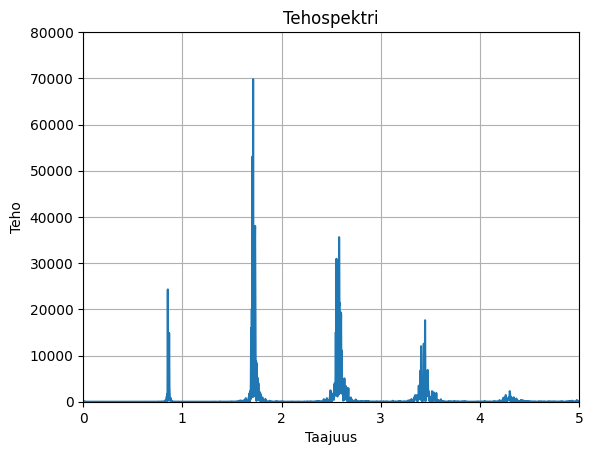

In [40]:
# Fourier-muunnos ja tehospektri

f = acc['Acceleration z (m/s^2)']		# Valitaan y-komponntti, koska se oli selkein
t = acc['Time (s)']		# Aika
N = len(acc)		# Havaintojen määrä

dt = np.mean(np.diff(t))	# Keskimääräinen näytteenottoväli

fourier = np.fft.fft(f,N)		# abcd

psd = fourier*np.conj(fourier)/N	# Tehospektri
freq = np.fft.fftfreq(N,dt)		# Taajuudet

L = np.arange(1, int(N/2))		# Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.plot(freq[L], psd[L].real)
plt.title('Tehospektri')
plt.xlabel('Taajuus')
plt.ylabel('Teho')
plt.grid()

plt.axis([0,5,0,80000])

print("Kävelydatan tehokkain taajuus: ", round(freq[L][psd[L]==np.max(psd[L])][0],2), "Hz")
print("Tämä vastaa askeleeseen kuluvaa aikaa: ", round(1/freq[L][psd[L]==np.max(psd[L])][0],2), "s")
print("Askelmäärä: ", round(freq[L][psd[L]==np.max(psd[L])][0]*np.max(t)))